<a href="https://colab.research.google.com/github/sagar9926/Pytorch/blob/master/Pytorch_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Outline

* Downloading dataset (CIFAR10)
* `Dataloader` in `torch.utils`
* Visualising images
* Single and multiple convolutional layers
* LeNet
* Training LeNet
* Training on GPU
* Simple visualisation
* Exercises

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

## Data loading

In [4]:
import torchvision
import torchvision.transforms as transforms

# Cifar is divided into 5 training batches and one test batches
trainset = torchvision.datasets.CIFAR10(root = './data',train = True  # yes i want to train this data
                                        ,download = True # yes i want to download it locally
                                        , transform=transforms.ToTensor())# apllying certain functions to the data at downlading step itself... Transform to tensor

                    

# .datasets hesl us to work with the images in aggregated format instead in form pof different bactes of 10k images each

Files already downloaded and verified


In [0]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
#Once we have dataset created locally we can load data from it in certain batchsizes e.g in our case batchsize is 4 
# which means every time i load i will get a batch of 4 images randomlly or sequentially based on shuffle

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

In [9]:
# To access the train loader we have to c reate a iterator for that

dataiter = iter(trainloader)
images, labels = dataiter.next() # this gives us one instance of four images and their corresponding labels

print(images.shape) #[(Batch size, channels, size of image)]

print(images[1].shape)
print(labels[1].item())


torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
7


## Visualise data

In [11]:
img = images[1]
print(type(img),img.shape)

<class 'torch.Tensor'> torch.Size([3, 32, 32])


In [12]:
# To plot the image first convert the image tensor to numpy

np_img = img.numpy()
print(np_img.shape)

(3, 32, 32)


In [13]:
# To plot the image we need to transpose the image , permute the dimension
# To be able to plot it we need it to be in the form of x,y,z where x and y correspond to the size of the image and z denotes the number of channels

np_img = np.transpose(np_img,(1,2,0))
print(np_img.shape)

(32, 32, 3)


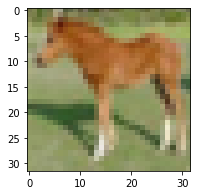

In [18]:
plt.figure(figsize = (3,3))
plt.imshow(np_img) # to plot image using matplotlib
plt.show() #32 x 32 image

In [0]:
def imshow(img):
    npimg = img.numpy()
    plt.figure(figsize = (10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [23]:
torchvision.utils.make_grid(images).shape # This represents the stacked images of the batch with 2 pixel padding (32* 4 + 2*5(black borders) = 138)


torch.Size([3, 36, 138])

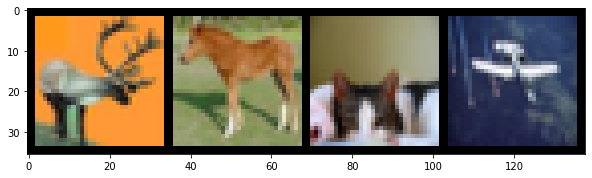

deer horse cat plane


In [27]:
imshow(torchvision.utils.make_grid(images)) #To plot the entire batch, stacks up the images in form of long image in which individual image will apper in cells
print(' '.join(classes[labels[j]] for j in range(4)))

## Single Convolutional Layer